In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Plotting Style ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 5)

# --- Mount Google Drive ---
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive Success！")
except Exception as e:
    print(f"Google Drive Fail {e}")

# --- Define File Paths ---
DATA_DIR = Path("/content/drive/MyDrive/Colab Notebooks/P_Dataset")
TRAIN_PATH = DATA_DIR / "SWaT_Dataset_Normal_v1.parquet"
TEST_PATH = DATA_DIR / "SWaT_Dataset_Attack_v0.parquet"

print(f"train_dir: {TRAIN_PATH}")
print(f"test_dir: {TEST_PATH}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive Success！
train_dir: /content/drive/MyDrive/Colab Notebooks/P_Dataset/SWaT_Dataset_Normal_v1.parquet
test_dir: /content/drive/MyDrive/Colab Notebooks/P_Dataset/SWaT_Dataset_Attack_v0.parquet


In [11]:
# --- Load Datasets ---
try:
    train_df = pd.read_parquet(TRAIN_PATH)
    test_df = pd.read_parquet(TEST_PATH)
    print("load data success")
except Exception as e:
    print(f"load data fail {e}")

# --- Data Cleaning and Formatting ---
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])
train_df = train_df.set_index('Timestamp')

features = [col for col in train_df.columns if col != 'Normal/Attack']
target = 'Normal/Attack'

print("\n--- trainset (Normal Data) ---")
print(f"Shape: {train_df.shape}")
print(f"features: {len(features)}")
print("\n")
display(train_df.head())

# --- training dataset time ---
print("\n--- train time ---")
start_time = train_df.index.min()
end_time = train_df.index.max()
duration = end_time - start_time
print(f"start time: {start_time}")
print(f"end time: {end_time}")
print(f"total time: {duration}")

load data success

--- trainset (Normal Data) ---
Shape: (495000, 52)
features: 51




,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:30:00,0.0,124.3135,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
2015-12-22 16:30:01,0.0,124.3920,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
2015-12-22 16:30:02,0.0,124.4705,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
2015-12-22 16:30:03,0.0,124.6668,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
2015-12-22 16:30:04,0.0,124.5098,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal



--- train time ---
start time: 2015-12-22 16:30:00
end time: 2015-12-28 09:59:59
total time: 5 days 17:29:59


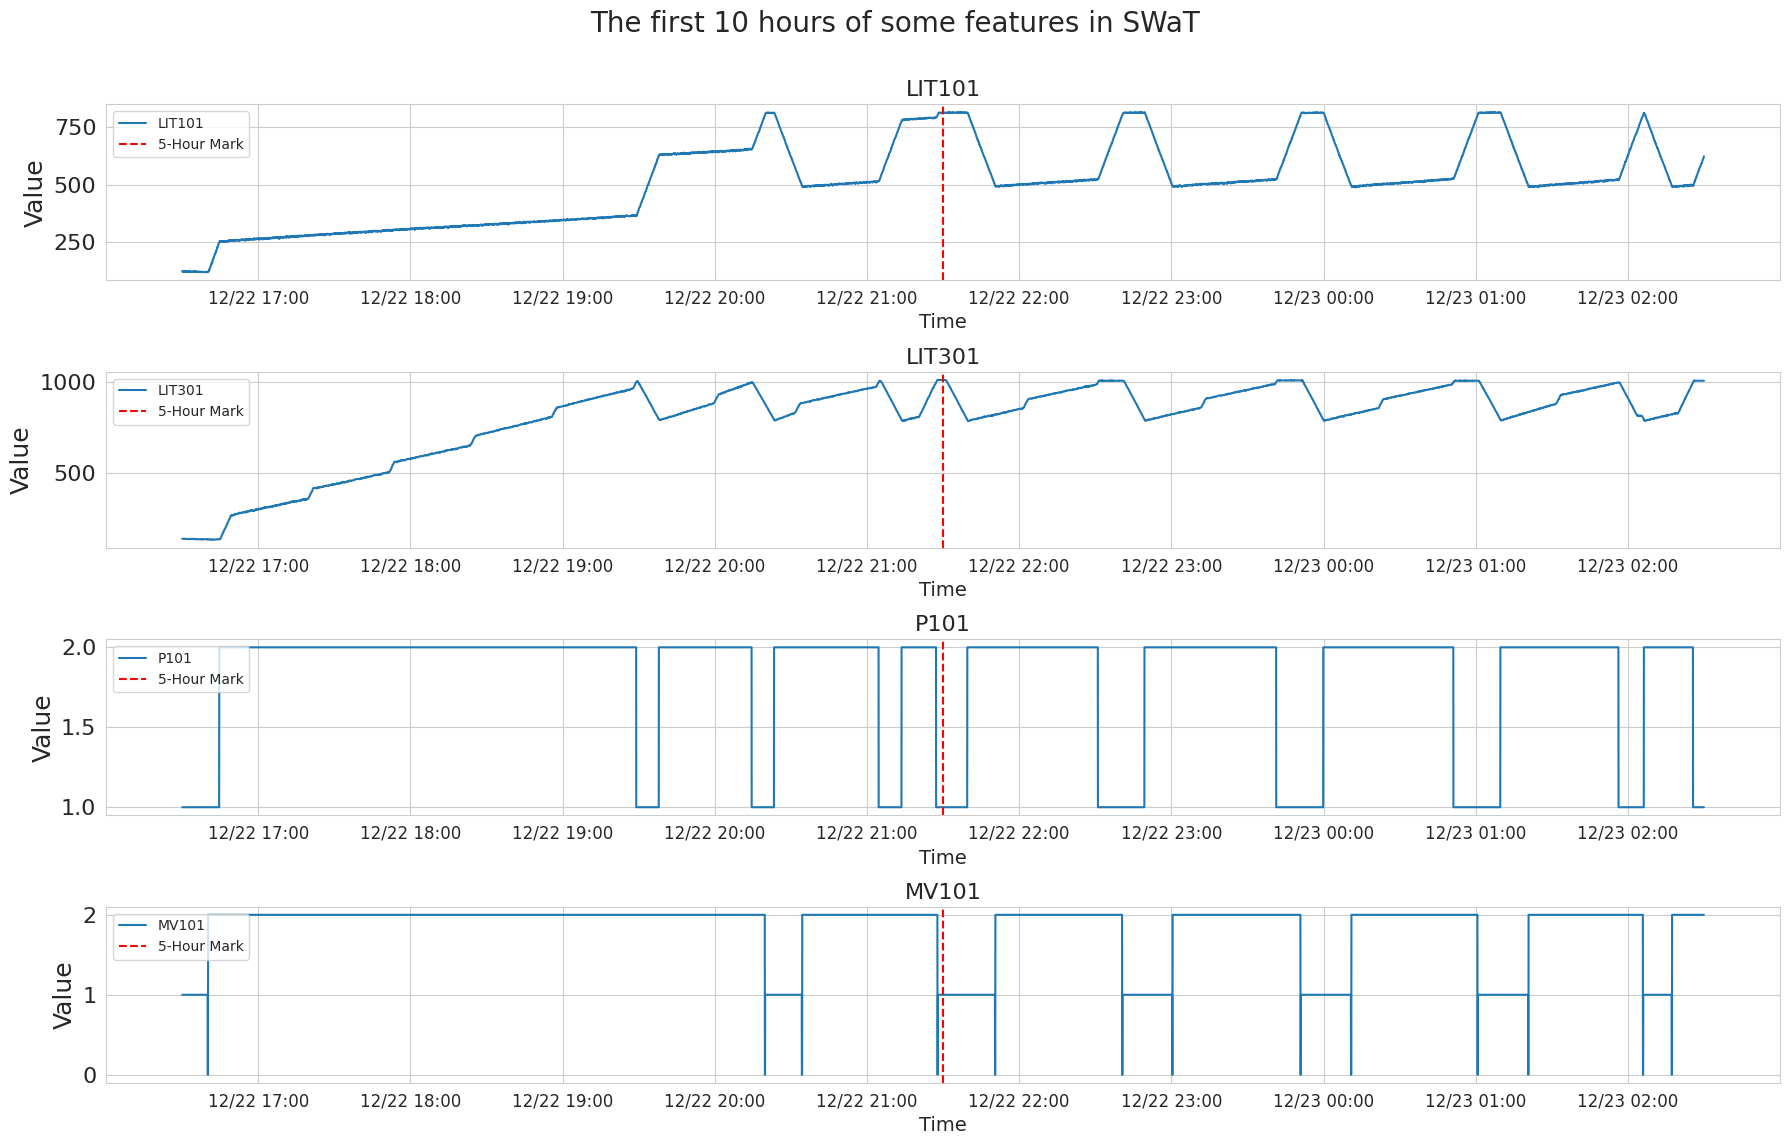


 original data size: 495000
after removing first 5 hours, data size 477000


In [13]:
# Steady-State Analysis
import matplotlib.dates as mdates

first_10_hours_df = train_df.iloc[:10 * 3600]

steady_state_features = ['LIT101', 'LIT301', 'P101', 'MV101']

fig, axes = plt.subplots(len(steady_state_features), 1, figsize=(18, 12))
fig.suptitle('The first 10 hours of some features in SWaT', fontsize=20)

for i, feature in enumerate(steady_state_features):

    ax = axes[i]
    ax.plot(first_10_hours_df.index, first_10_hours_df[feature], label=feature)
    ax.set_title(f'{feature}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

    ax.set_title(f'{feature}', fontsize=16)
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Value', fontsize=18)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=16)
    ax.legend(fontsize=14)


    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))

    # ax.axvline(seven_hours_mark, color='red', linestyle='--', label='5-Hour Mark')
    # ax.legend(loc='upper left')
    seven_hours_mark = first_10_hours_df.index[0] + pd.Timedelta(hours=5)
    ax.axvline(seven_hours_mark, color='red', linestyle='--', label='5-Hour Mark')
    ax.legend(loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


#  after removing first 5 hours ,data size
seconds_to_drop = 5 * 3600
train_df_steady = train_df.iloc[seconds_to_drop:].copy()
print(f"\n original data size: {train_df.shape[0]}")
print(f"after removing first 5 hours, data size {train_df_steady.shape[0]}")

In [14]:
label_col = 'Normal/Attack'

def numeric_feature_cols(df, label_col='Normal/Attack'):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if label_col in num_cols:
        num_cols.remove(label_col)
    return num_cols

# if do not remove first 5 hours
num_cols_full = numeric_feature_cols(train_df, label_col)
const_full = (
    train_df[num_cols_full].nunique(dropna=False)
      .loc[lambda s: s <= 1].index.tolist()
)

# after removing first 5 hours
samples_per_hour = 3600
train_df_cut = train_df.iloc[5 * samples_per_hour:]
num_cols_cut = numeric_feature_cols(train_df_cut, label_col)
const_cut = (
    train_df_cut[num_cols_cut].nunique(dropna=False)
      .loc[lambda s: s <= 1].index.tolist()
)

print(f"do not remove first 5 hours, the removed features {len(const_full)} -> {const_full}")
print(f"after removing first 5 hours, the removed features {len(const_cut)}  -> {const_cut}")

extra = sorted(set(const_cut) - set(const_full))
print(f"\nmore  remove: {extra}")


do not remove first 5 hours, the removed features 11 -> ['P102', 'P201', 'P202', 'P204', 'P206', 'P401', 'P403', 'P404', 'P502', 'P601', 'P603']
after removing first 5 hours, the removed features 14  -> ['P102', 'P201', 'P202', 'P204', 'P206', 'P401', 'P402', 'P403', 'P404', 'UV401', 'P501', 'P502', 'P601', 'P603']

more  remove: ['P402', 'P501', 'UV401']


Zero-variance features (14): ['P206', 'P201', 'P102', 'P204', 'P202', 'P401', 'UV401', 'P404', 'P403', 'P402', 'P501', 'P502', 'P601', 'P603']


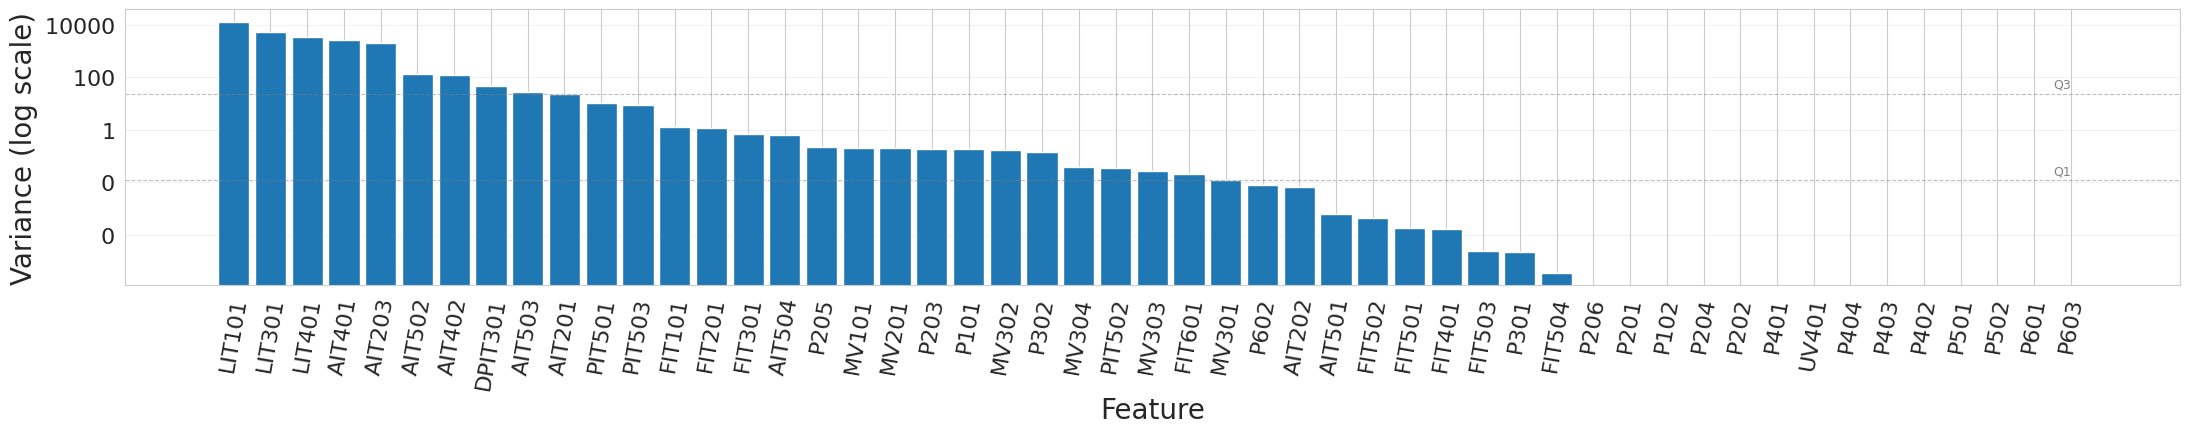

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter

def plot_feature_variance(train_df_cut, label_col='Normal/Attack', save_path=None):
    """
    Plot per-feature variance on the SWaT training set (after removing first 5 hours).
    Highlights zero-variance features and adds an English caption.
    """
    # numeric features only (drop label if present)
    num_cols = train_df_cut.select_dtypes(include=[np.number]).columns.tolist()
    if label_col in num_cols:
        num_cols.remove(label_col)

    # ddof=0 keeps consistency with MinMax-style stats
    var_ser = train_df_cut[num_cols].var(axis=0, ddof=0).sort_values(ascending=False)
    zero_var = var_ser[var_ser == 0.0].index.tolist()

    # ---------------- plot ----------------
    fig, ax = plt.subplots(figsize=(22, 5))
    colors = ['#1f77b4' if c not in zero_var else '#d62728' for c in var_ser.index]
    ax.bar(var_ser.index, var_ser.values, color=colors, width=0.85)

    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')
    ax.grid(axis='y', which='both', alpha=.25)

    # ax.set_title('SWaT train (after removing first 5 hours): feature-wise variance', fontsize=16, pad=10)
    ax.set_xlabel('Feature', fontsize=20)
    ax.set_ylabel('Variance (log scale)', fontsize=20)
    ax.tick_params(axis='x', labelrotation=80, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    # # Legend
    # ax.legend(handles=[
    #     mpatches.Patch(color='#1f77b4', label='Variance > 0'),
    #     mpatches.Patch(color='#d62728', label='Variance = 0'),
    # ], frameon=False, loc='upper right')

    # Optional reference lines at Q1/Q3 of non-zero variances
    nz = var_ser[var_ser > 0].values
    if len(nz) > 0:
        q1, q3 = np.quantile(nz, [0.25, 0.75])
        ax.axhline(q1, ls='--', lw=0.8, color='gray', alpha=.5)
        ax.axhline(q3, ls='--', lw=0.8, color='gray', alpha=.5)
        ax.annotate('Q1', xy=(len(var_ser)-1, q1), xytext=(len(var_ser)-1, q1*1.7),
                    ha='right', fontsize=9, color='gray')
        ax.annotate('Q3', xy=(len(var_ser)-1, q3), xytext=(len(var_ser)-1, q3*1.7),
                    ha='right', fontsize=9, color='gray')

    # English caption under the figure
    fig.tight_layout(rect=[0, 0.06, 1, 0.95])
    # fig.text(0.5, 0.015,
    #          'Figure: Feature variances computed on the training set after discarding the first 5 hours. '
    #          'Zero-variance sensors are highlighted in red.',
    #          ha='center', fontsize=11, style='italic')

    if save_path:
        fig.savefig(save_path, dpi=220, bbox_inches='tight')

    return var_ser, zero_var


var_ser, zero_var = plot_feature_variance(train_df_cut, label_col='Normal/Attack',
                                          save_path='swat_feature_variance.png')
print(f'Zero-variance features ({len(zero_var)}): {zero_var}')



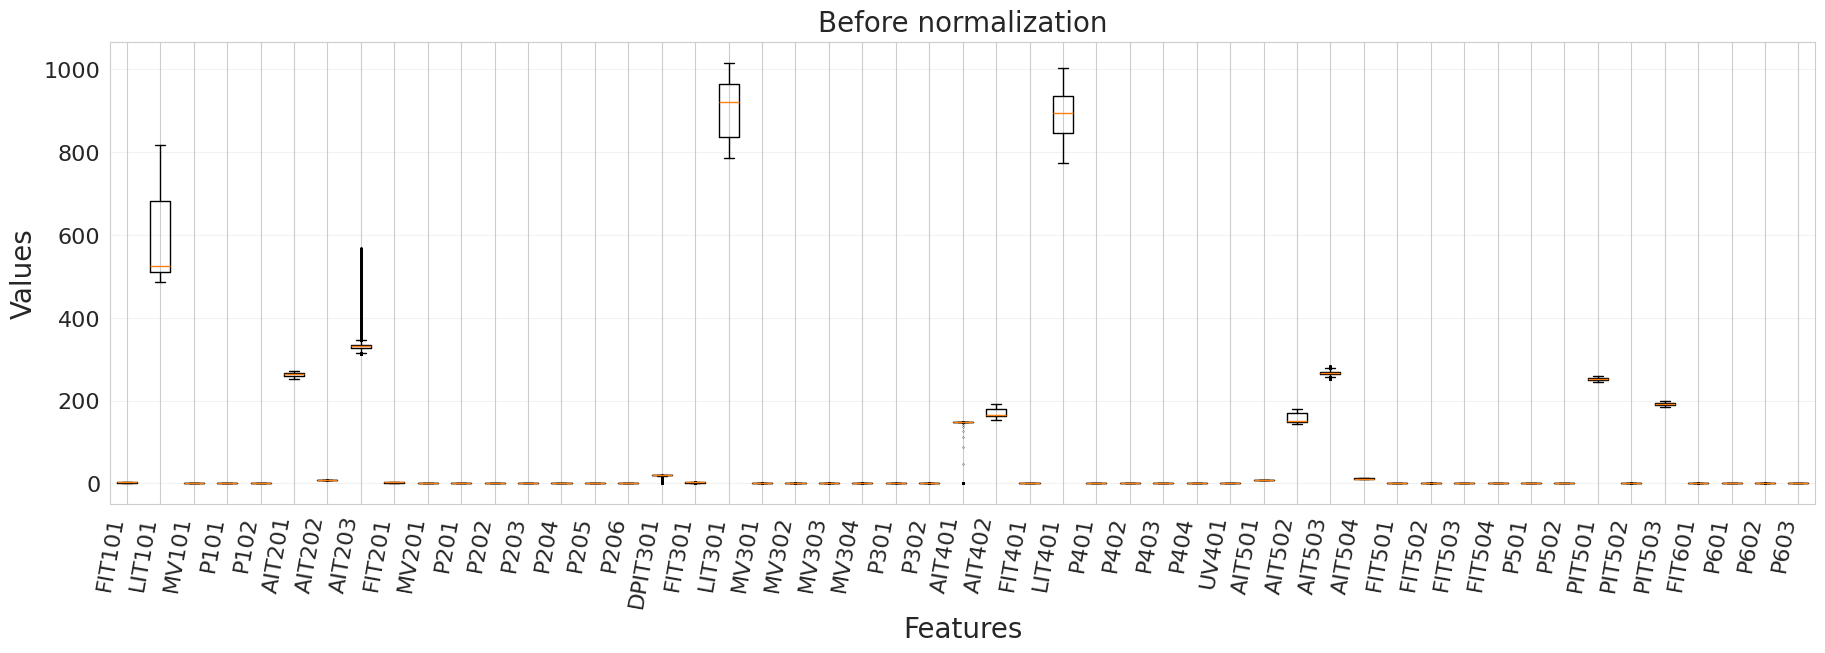

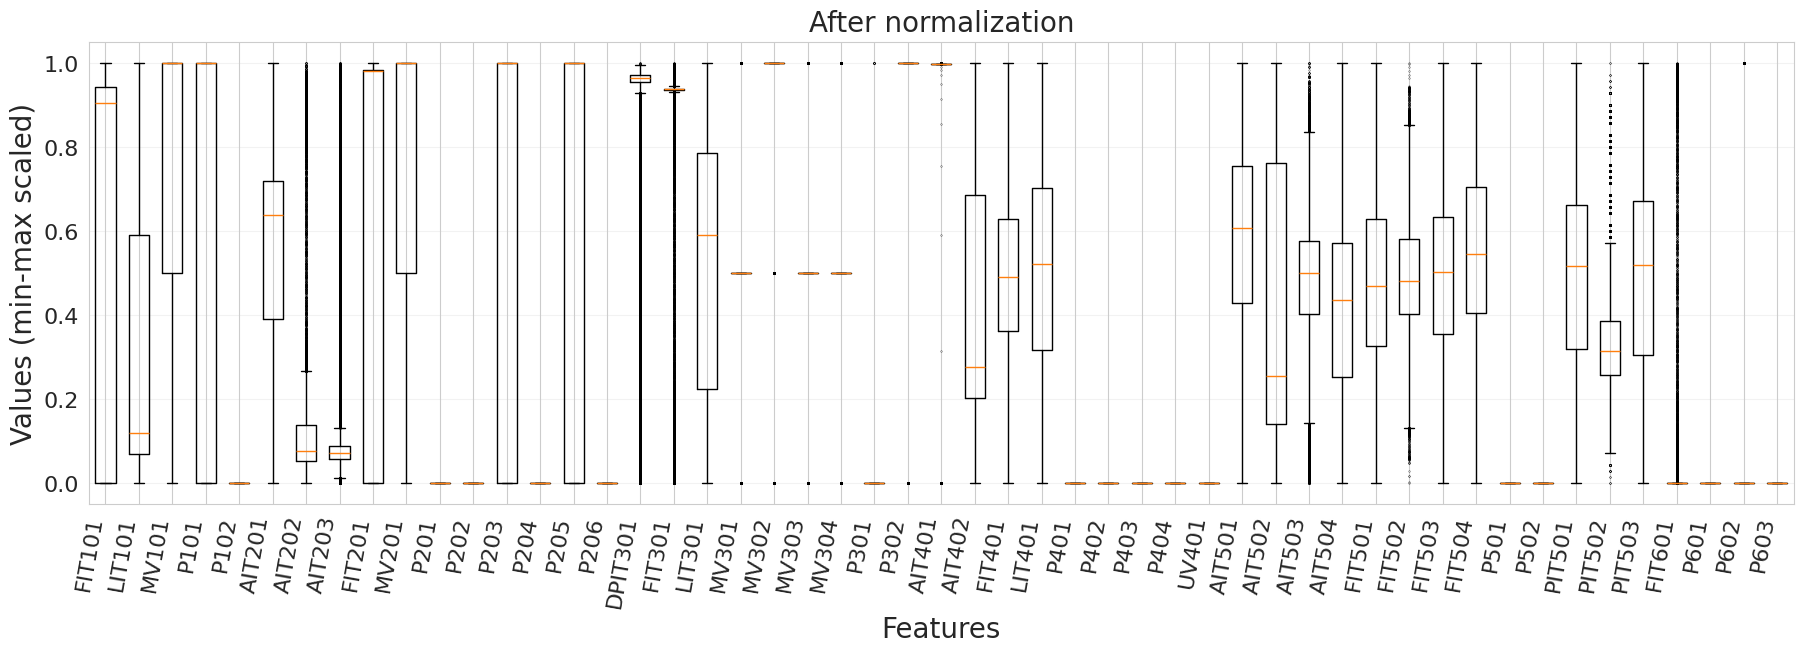

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

LABEL_COL = 'Normal/Attack'


num_cols = (
    train_df_cut.select_dtypes(include=[np.number]).columns
    .drop(labels=[LABEL_COL], errors='ignore')
    .tolist()
)

# MinMax
X = train_df_cut[num_cols].to_numpy(dtype=np.float32, copy=False)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=num_cols, index=train_df_cut.index)


plot_before = train_df_cut[num_cols]
plot_after  = df_scaled[num_cols]

def boxplot_per_feature(df, title, ylabel):
    fig, ax = plt.subplots(figsize=(22, 6))
    data = [df[c].dropna().values for c in df.columns]
    ax.boxplot(
        data,
        showfliers=True,
        flierprops=dict(markersize=1.2, marker='o', markeredgewidth=0.2),
        widths=0.6
    )
    ax.set_title(title, fontsize=20, pad=8)
    ax.set_xlabel('Features', fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xticks(range(1, len(df.columns) + 1))
    ax.set_xticklabels(df.columns, rotation=80, ha='right', fontsize=16)
    ax.grid(axis='y', alpha=0.25)

    ax.tick_params(axis='y', labelsize=16)

    plt.show()

boxplot_per_feature(plot_before, 'Before normalization', 'Values')
print('\n\n\n')
boxplot_per_feature(plot_after,  'After normalization',  'Values (min-max scaled)')


In [18]:
# continuous and discrete features

df_to_analyze = train_df_steady[features]

unique_counts = df_to_analyze.nunique()

discrete_threshold = 3
discrete_features = unique_counts[unique_counts <= discrete_threshold].index.tolist()
continuous_features = unique_counts[unique_counts > discrete_threshold].index.tolist()

print(f"continuous: {len(continuous_features)}")
print(f"discrete: {len(discrete_features)}")

print("\ndiscrete features:")
print(discrete_features)

continuous: 25
discrete: 26

discrete features:
['MV101', 'P101', 'P102', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'UV401', 'P501', 'P502', 'P601', 'P602', 'P603']


,count,mean,std,min,25%,50%,75%,max
FIT101,477000.0,1.832865,1.141247,0.000000,0.000000,2.489511,2.590718,2.745092
LIT101,477000.0,593.460085,114.692279,486.380900,509.540000,526.261700,681.938200,817.556500
AIT201,477000.0,263.827752,4.843726,252.851800,260.574200,265.444800,267.014900,272.526300
AIT202,477000.0,8.385812,0.082364,8.314407,8.349654,8.366317,8.407652,8.988273
AIT203,477000.0,344.092915,44.312736,312.278900,327.146900,330.787000,334.785900,567.469900
FIT201,477000.0,1.823806,1.064328,0.000000,0.000000,2.442444,2.451158,2.487938
DPIT301,477000.0,16.595900,6.748126,0.000000,19.629940,19.838020,19.978870,20.555090
FIT301,477000.0,1.835937,0.823390,0.000000,2.209013,2.213881,2.217211,2.358774
LIT301,477000.0,907.520999,71.349175,785.135300,836.644500,920.797500,965.417500,1014.524000
AIT401,477000.0,129.423436,50.081881,0.000000,148.803200,148.803200,148.808000,148.856100


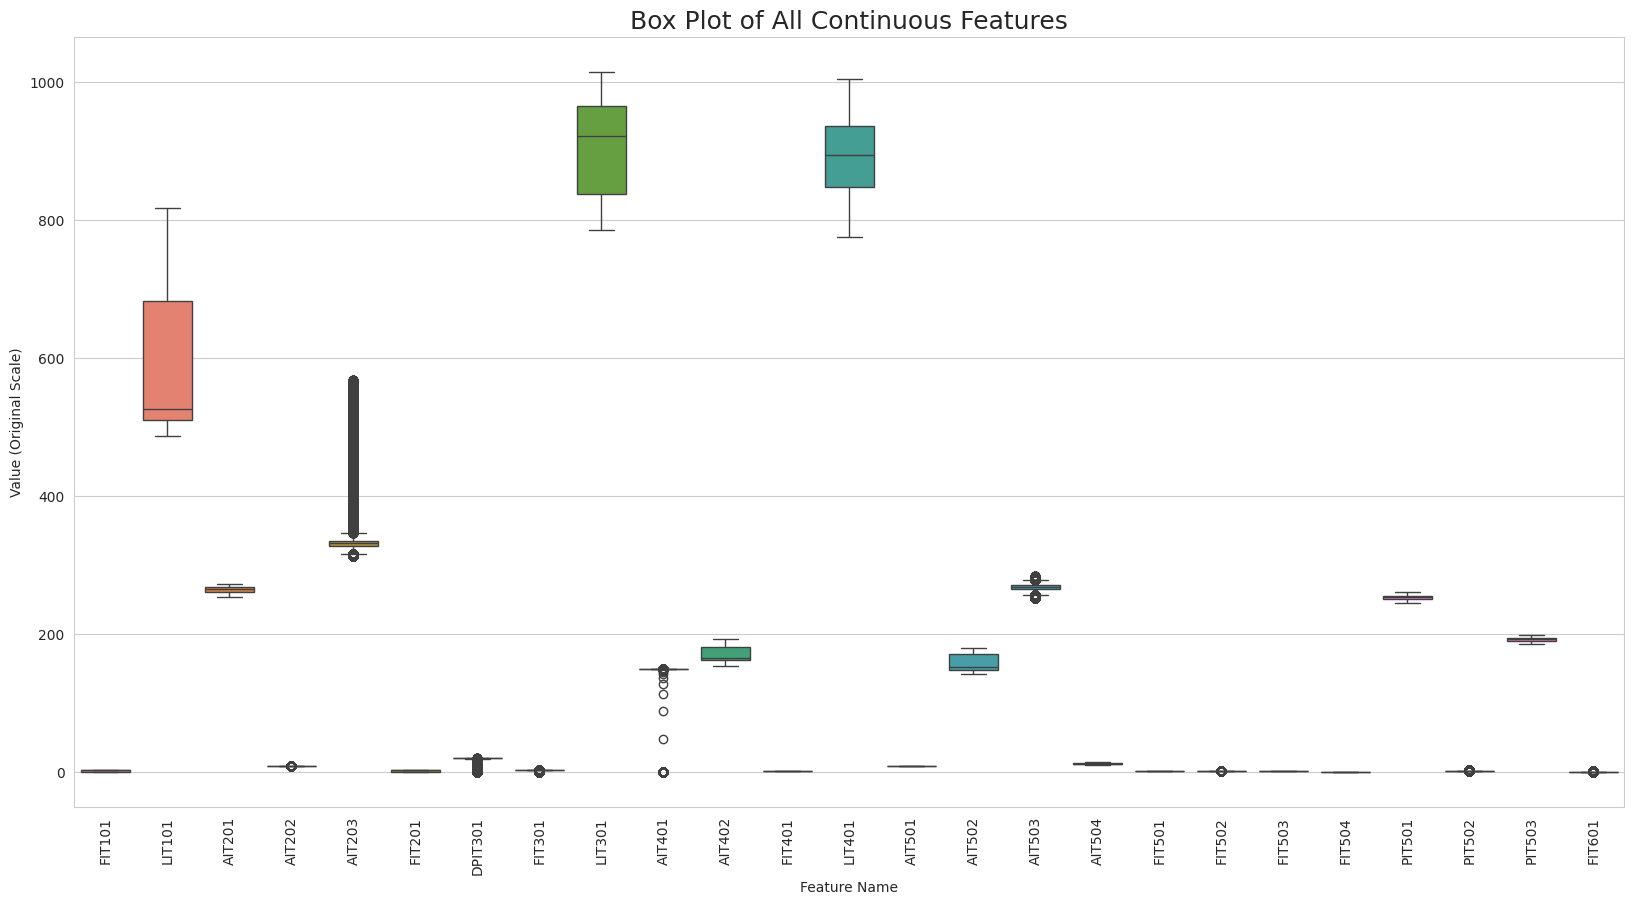

In [19]:
# continuous features analysis


display(df_to_analyze[continuous_features].describe().T)

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_to_analyze[continuous_features])
plt.xticks(rotation=90)

plt.title('Box Plot of All Continuous Features', fontsize=18)
plt.xlabel('Feature Name')
plt.ylabel('Value (Original Scale)')
plt.show()

,count,mean,std,min,25%,50%,75%,max
MV101,477000.0,1.713501,0.461129,0.0,1.0,2.0,2.0,2.0
P101,477000.0,1.745233,0.435731,1.0,1.0,2.0,2.0,2.0
P102,477000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
MV201,477000.0,1.742034,0.445766,0.0,1.0,2.0,2.0,2.0
P201,477000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
P202,477000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
P203,477000.0,1.743321,0.436801,1.0,1.0,2.0,2.0,2.0
P204,477000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
P205,477000.0,1.681572,0.465867,1.0,1.0,2.0,2.0,2.0
P206,477000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0



feature: MV101
MV101
2    342301
1    132738
0      1961
Name: count, dtype: int64
------------------------------

feature: P101
P101
2    355476
1    121524
Name: count, dtype: int64
------------------------------

feature: P102
P102
1    477000
Name: count, dtype: int64
------------------------------

feature: MV201
MV201
2    355688
1    119574
0      1738
Name: count, dtype: int64
------------------------------

feature: P201
P201
1    477000
Name: count, dtype: int64
------------------------------

feature: P202
P202
1    477000
Name: count, dtype: int64
------------------------------

feature: P203
P203
2    354564
1    122436
Name: count, dtype: int64
------------------------------

feature: P204
P204
1    477000
Name: count, dtype: int64
------------------------------

feature: P205
P205
2    325110
1    151890
Name: count, dtype: int64
------------------------------

feature: P206
P206
1    477000
Name: count, dtype: int64
------------------------------

feature: MV301
MV301


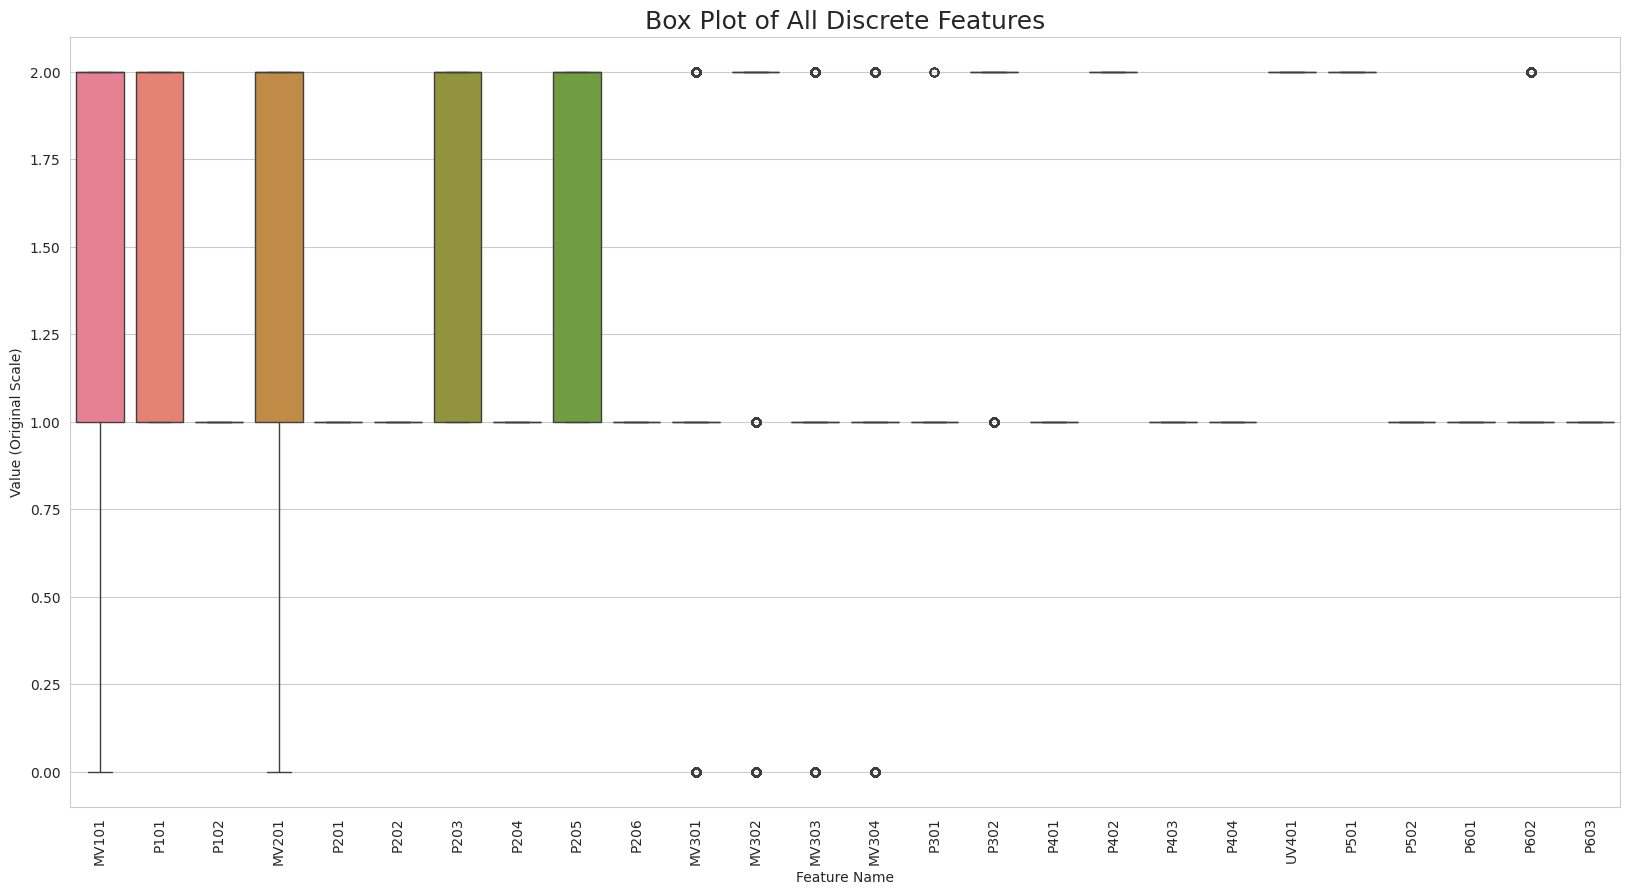

In [20]:
# discrete features analysis


display(df_to_analyze[discrete_features].describe().T)


for feature in discrete_features:
    print(f"\nfeature: {feature}")
    print(df_to_analyze[feature].value_counts())
    print("-" * 30)


print("\n\n")
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_to_analyze[discrete_features])
plt.xticks(rotation=90)
plt.title('Box Plot of All Discrete Features', fontsize=18)
plt.xlabel('Feature Name')
plt.ylabel('Value (Original Scale)')
plt.show()

correlations matrix


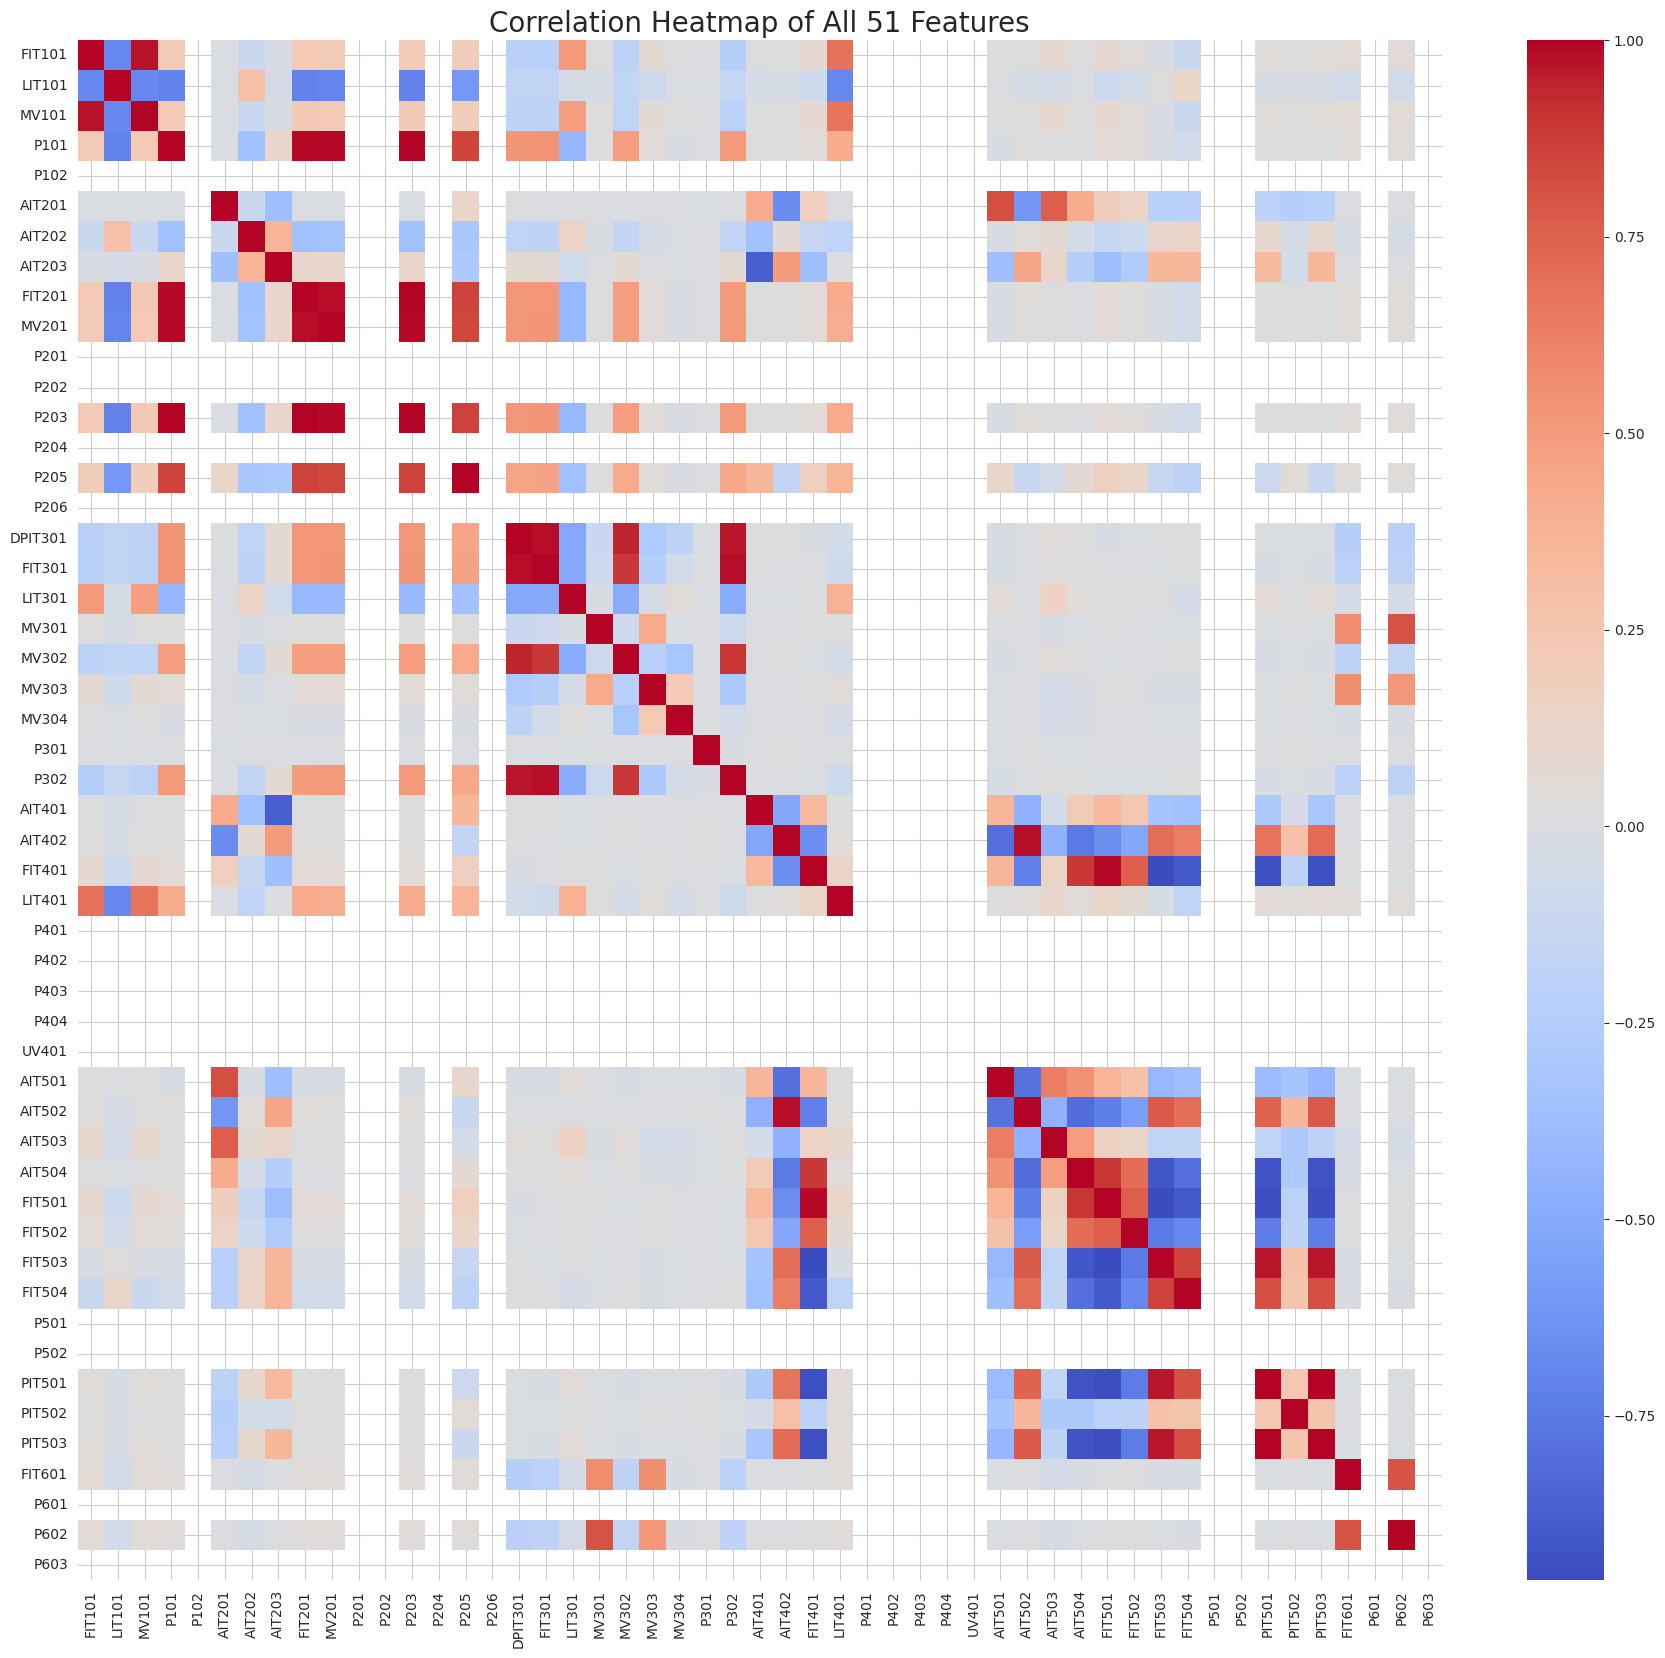


correlations > 0.95 ：
PIT501   PIT503    0.997759
FIT201   P203      0.996213
P101     P203      0.992743
         FIT201    0.992054
         MV201     0.989762
FIT401   FIT501    0.986831
MV201    P203      0.984717
FIT301   P302      0.980072
AIT402   AIT502    0.978491
DPIT301  FIT301    0.977519
dtype: float64


In [21]:
print("correlations matrix")

correlation_matrix = df_to_analyze.corr()

plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of All 51 Features', fontsize=20)
plt.show()


def get_highly_correlated_pairs(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    return upper[upper > threshold].stack().sort_values(ascending=False)

high_corr_pairs = get_highly_correlated_pairs(df_to_analyze)
print("\ncorrelations > 0.95 ：")
print(high_corr_pairs.head(10))


load success
type: (449919, 53)


anomaly rate

 noramal : attack (number)
Attack
0    395335
1     54584
Name: count, dtype: int64

 normal : attack (rate)
Attack
0    87.868038
1    12.131962
Name: proportion, dtype: float64


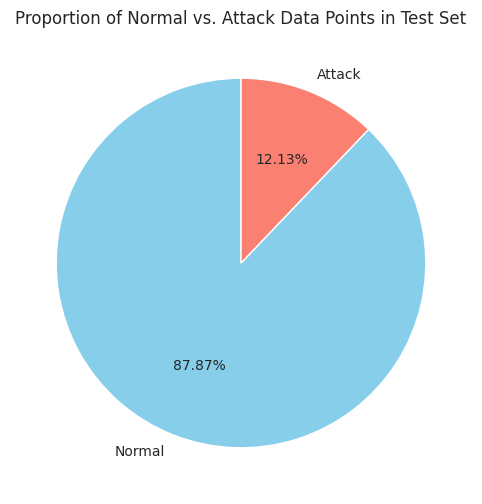



 anomaly duration time
attack counts: 35

attck duration time:
  avg duration time: 1559.54 s
  min duration time: 101.00 s
  max duration time: 35900.00 s
  median duration time: 444.00 s
  std duration time: 5985.49 s


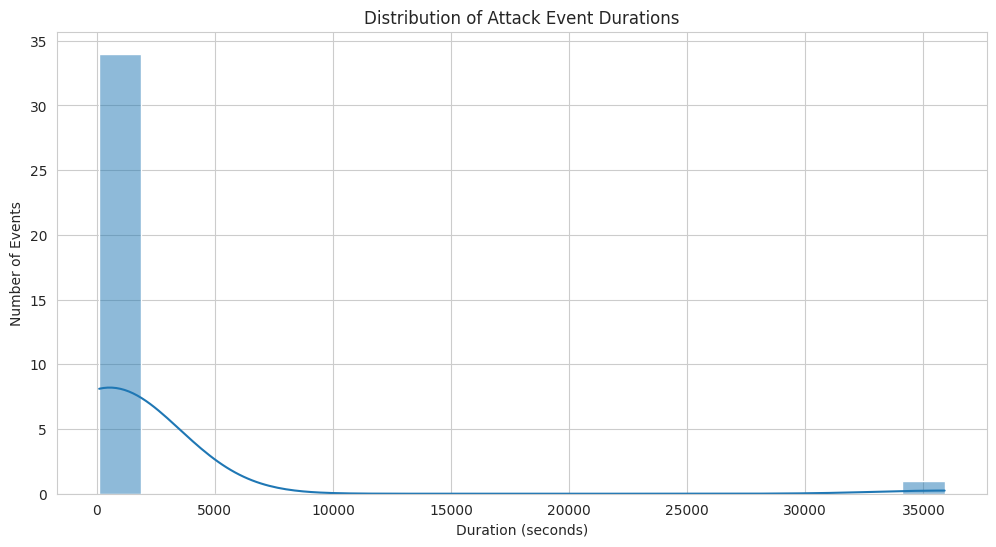

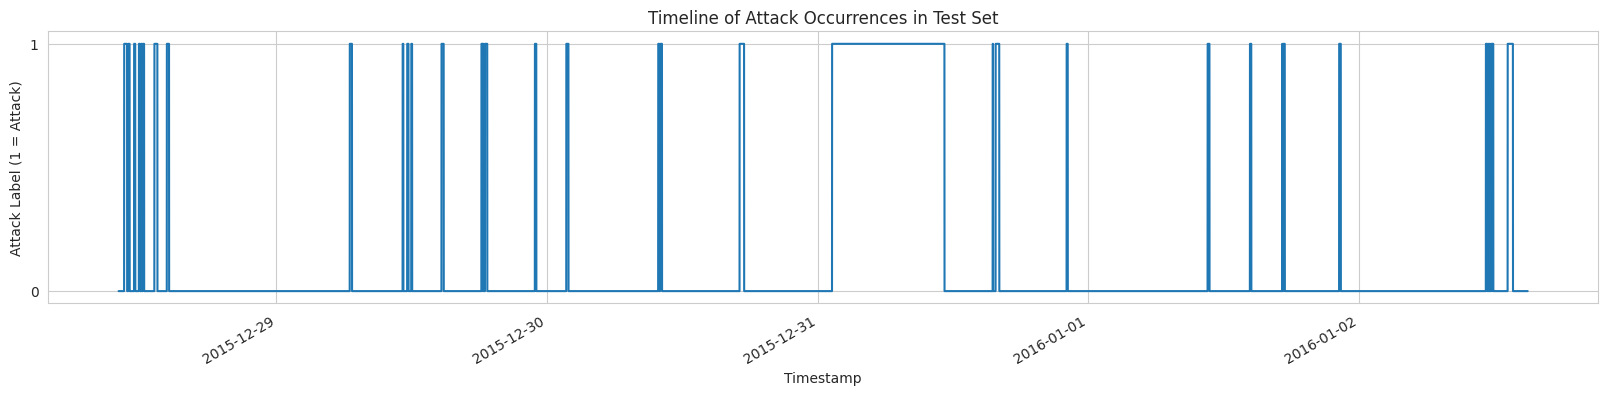



---
in attack time, top 15 fluctuation features
FIT501     32.433638
FIT503     29.428439
PIT501     29.214093
PIT503     29.096494
FIT502     25.614191
FIT401     25.023550
FIT504     22.646899
AIT402     15.008927
AIT502      9.762746
AIT504      4.790067
AIT501      3.822628
LIT401      3.369245
PIT502      2.086696
AIT202      1.571304
DPIT301     1.527440
dtype: float64


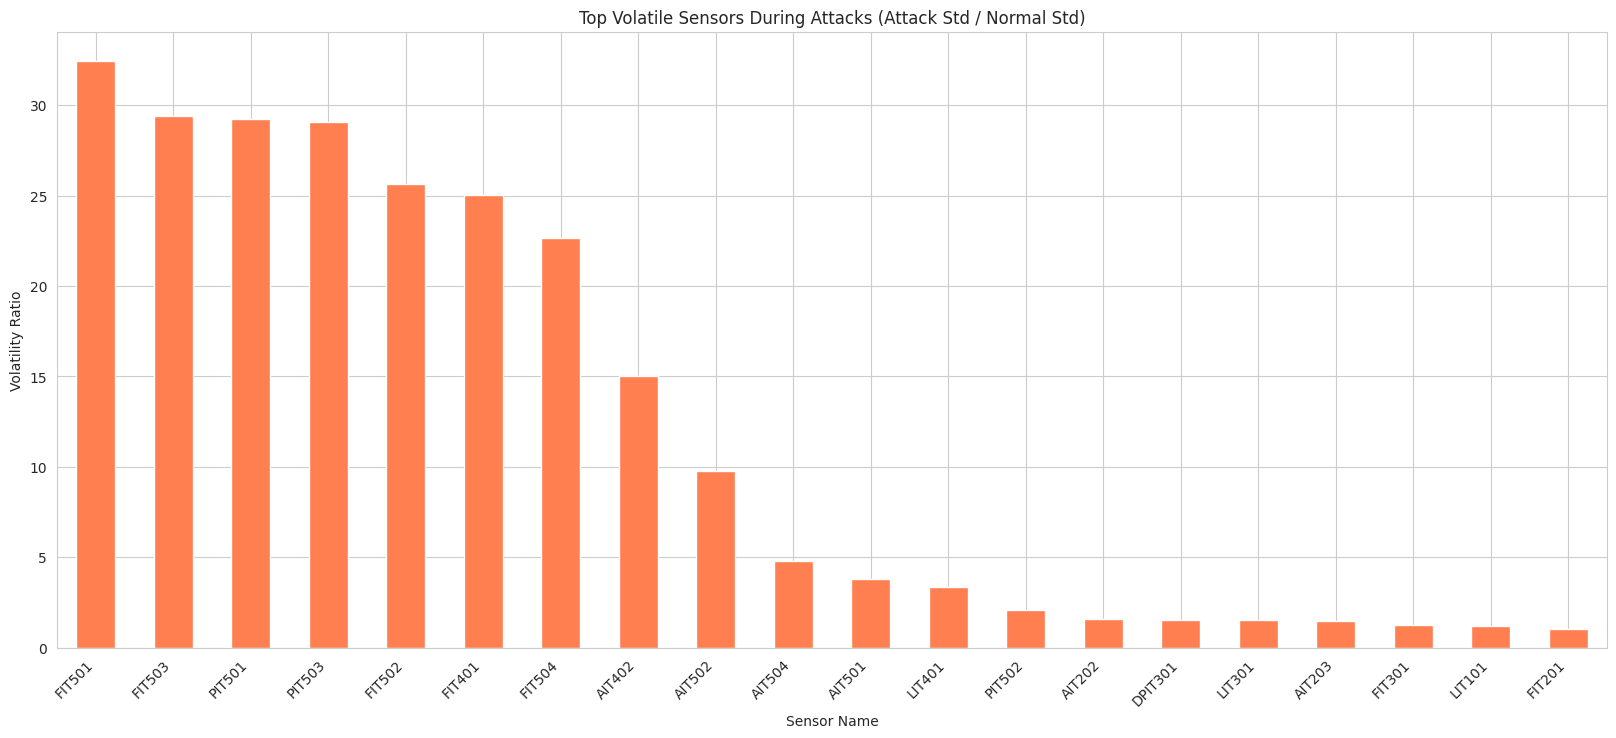

In [23]:
# testset

try:
    test_df = pd.read_parquet(TEST_PATH)
    test_df.columns = test_df.columns.str.strip()
    test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])
    test_df = test_df.set_index('Timestamp')

    test_df['Attack'] = (test_df['Normal/Attack'] == 'Attack').astype(int)
    print("load success")
    print(f"type: {test_df.shape}")

except Exception as e:
    print(f"load fail: {e}")

print("\n\nanomaly rate")
attack_counts = test_df['Attack'].value_counts()
attack_percentage = test_df['Attack'].value_counts(normalize=True) * 100

print("\n noramal : attack (number)")
print(attack_counts)
print("\n normal : attack (rate)")
print(attack_percentage)

plt.figure(figsize=(8, 6))
attack_percentage.plot(kind='pie', autopct='%1.2f%%', startangle=90,
                       labels=['Normal', 'Attack'], colors=['skyblue', 'salmon'])

plt.title('Proportion of Normal vs. Attack Data Points in Test Set')
plt.ylabel('')
plt.show()


print("\n\n anomaly duration time")
attack_diffs = test_df['Attack'].diff()

attack_starts = test_df.index[attack_diffs == 1]
attack_ends = test_df.index[attack_diffs == -1]


if len(attack_starts) == len(attack_ends):


    durations_series = pd.Series(attack_ends - attack_starts)

    attack_durations = durations_series.dt.total_seconds()

    print(f"attack counts: {len(attack_durations)}")
    print("\nattck duration time:")
    print(f"  avg duration time: {attack_durations.mean():.2f} s")
    print(f"  min duration time: {attack_durations.min():.2f} s")
    print(f"  max duration time: {attack_durations.max():.2f} s")
    print(f"  median duration time: {attack_durations.median():.2f} s")
    print(f"  std duration time: {attack_durations.std():.2f} s")

    plt.figure(figsize=(12, 6))
    sns.histplot(attack_durations, bins=20, kde=True)
    plt.title('Distribution of Attack Event Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of Events')
    plt.show()

else:
    print("error:")
    print(f" {len(attack_starts)} {len(attack_ends)} ")



print("\n\n")
plt.figure(figsize=(20, 4))
test_df['Attack'].plot()
plt.title('Timeline of Attack Occurrences in Test Set')
plt.xlabel('Timestamp')
plt.ylabel('Attack Label (1 = Attack)')
plt.yticks([0, 1])
plt.show()


print("\n\n---")


features = [col for col in test_df.columns if col not in ['Normal/Attack', 'Attack']]
# ==========================================================

normal_periods_df = test_df[test_df['Attack'] == 0]
attack_periods_df = test_df[test_df['Attack'] == 1]


continuous_features = [col for col in features if test_df[col].nunique() > 3]

std_normal = normal_periods_df[continuous_features].std()
std_attack = attack_periods_df[continuous_features].std()


volatility_ratio = (std_attack / (std_normal + 1e-9)).sort_values(ascending=False)

print("in attack time, top 15 fluctuation features")
print(volatility_ratio.head(15))

plt.figure(figsize=(20, 8))
volatility_ratio.head(20).plot(kind='bar', color='coral')
plt.title('Top Volatile Sensors During Attacks (Attack Std / Normal Std)')
plt.xlabel('Sensor Name')
plt.ylabel('Volatility Ratio')
plt.xticks(rotation=45, ha='right')
plt.show()
